<a href="https://colab.research.google.com/github/Besita/Besita/blob/main/digit_recogniser_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(13)

In [ ]:
#from google.colab import files
#uploaded=files.upload()

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')



FileNotFoundError: ignored

In [ ]:
Y=train_df['label']
X1=train_df.drop('label',axis=1)
print(np.shape(X1))
X1=np.array(X1).reshape(-1,28,28) 
print(np.shape(X1))
X = np.array(X1).reshape(-1,28,28,1) / 255.0
#test = np.array(test_df).reshape(-1, 28, 28, 1) / 255.0
print(np.shape(X),np.shape(Y))
print(np.shape(test_df))

(42000, 784)
(42000, 28, 28)
(42000, 28, 28, 1) (42000,)
(28000, 784)


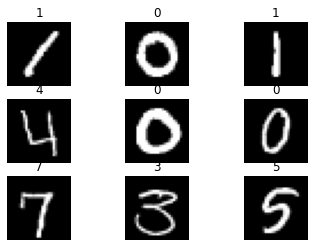

In [ ]:
# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(X1[i], cmap=plt.get_cmap('gray'))
  plt.title(Y[i])
  plt.axis(False)
# show the figure
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(validation_split = 0.2)

In [ ]:
def Charts(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(2))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(128, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = Adam(learning_rate = 3e-4), loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [ ]:
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        acc = logs['accuracy']
        val_acc = logs['val_accuracy']
        if acc >= 0.999 and val_acc >= 0.99995:
            self.model.stop_training = True

Epoch 1/50
21/21 [==============================] - 14s 87ms/step - loss: 1.5676 - accuracy: 0.5104 - val_loss: 1.5990 - val_accuracy: 0.5157
Epoch 2/50
21/21 [==============================] - 1s 58ms/step - loss: 0.4623 - accuracy: 0.8527 - val_loss: 0.9680 - val_accuracy: 0.7100
Epoch 3/50
21/21 [==============================] - 1s 58ms/step - loss: 0.2722 - accuracy: 0.9134 - val_loss: 0.5609 - val_accuracy: 0.8779
Epoch 4/50
21/21 [==============================] - 1s 59ms/step - loss: 0.2017 - accuracy: 0.9372 - val_loss: 0.4039 - val_accuracy: 0.9133
Epoch 5/50
21/21 [==============================] - 1s 58ms/step - loss: 0.1635 - accuracy: 0.9493 - val_loss: 0.3436 - val_accuracy: 0.9167
Epoch 6/50
21/21 [==============================] - 1s 58ms/step - loss: 0.1347 - accuracy: 0.9583 - val_loss: 0.2957 - val_accuracy: 0.9254
Epoch 7/50
21/21 [==============================] - 1s 56ms/step - loss: 0.1201 - accuracy: 0.9628 - val_loss: 0.2745 - val_accuracy: 0.9229
Epoch 8/50
2

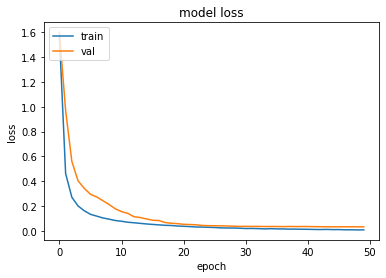

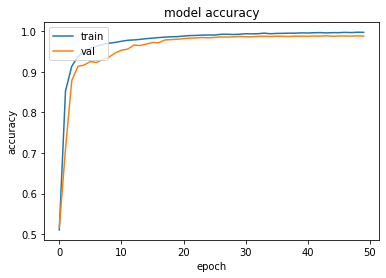

In [ ]:
history = model.fit(gen.flow(X, y = Y, subset = 'training', batch_size = 1600), validation_data=gen.flow(X, y = Y, subset = 'validation', batch_size = 1600),
                    epochs = 100, verbose = 1, callbacks = [CustomCallbacks()])
Charts(history)

In [ ]:
model.save('model_digitrecogniser.h5')

In [ ]:
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

model = load_model('model_digitrecogniser.h5')

test =np.array(test_df).reshape(-1, 28, 28, 1)/255.0
pred= model.predict(test)
digit=argmax(pred,axis=-1)
digit = pd.Series(digit, name='Label')
image_id = pd.Series(range(1,28001),name='ImageId')
image_id.isnull().sum()

pred = pd.concat([image_id,digit],axis=1)
pred.to_csv('submission.csv',index=False)

#for i in range(9):
#  # define subplot
#  plt.subplot(330 + 1 + i)
#  # plot raw pixel data
#  test=np.array(test_df).reshape(-1,28,28)
#  #print(test.shape)
#  plt.imshow(test[i], cmap=plt.get_cmap('gray'))
#  img =test[i].reshape(-1, 28, 28, 1)/255.0
#  predict_value = model.predict(img)
#  digit = argmax(predict_value)
#  plt.title(digit)
#  plt.axis(False)
#  #plt.xlabel(print('recognised digit is',digit))